Goal: predict housing prices

# Create Fake Data 

Here we will only have one feature (house size in sqm)

Our output is simply to predict the price of the house (in thousands of dollars)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import scipy.stats as scs

# Step 1: Choose a Model

## Model Types

Let's choose a linear model and teak it to match data points by changing gradient and y-intercept

## Cost Function

For regression, let's choose sum of squares

 <img src="imgs/linearRegLossFun.png">

We want to minimize:

$loss = \Sigma{(\hat{y}-y)^2}$

# Step 2: Create the Model in TF

**Placeholders** represent entry point for us to feed actual data values into the model during training (i.e. when performing gradient descent)

In [2]:
num_features = 1 #one feature, house size
x_tf = tf.placeholder(tf.float32, [None, num_features]) 

**Variables** represent 'good' values that mininimize cost function

In [3]:
num_outputs = 1 #num variables I try to predict
W = tf.Variable(tf.zeros([num_outputs, num_features]))
b = tf.Variable(tf.zeros([num_features]))

The linear model (y = W.x + b) in TF then becomes: 

In [4]:
y = tf.matmul(x_tf, W) + b

## Cost Function in TF

Similrily, to feed actual house prices of the data points into the model, we create a placeholder

In [5]:
y_tf = tf.placeholder(tf.float32, [None, num_outputs])

Our cost function of least-min squared becomes

In [6]:
cost = tf.reduce_sum(tf.pow((y_tf - y), 2))

## Data

Since we do not have actual data points for house price and house size, we generate them

In [7]:
npts = 1000
xs = scs.uniform(0, 100).rvs(npts)
ys = np.array(5*xs + scs.norm(0, 5.0).rvs(npts))

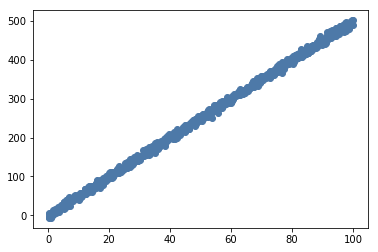

In [8]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

## Gradient Descent

Wit the linear model, cost function, and data, we can start performing gradient descent to minimize the cost function to obtain the 'good' values for W, b

In [17]:
alpha = 0.000000001 # learning rate
train_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

# Step 3: Train the Model

Traing involves performing gradient descent a pre-determined number of times or until the cost is below a pre-determined threshold.

## TF Quirks

All variables need to be initialized at the start of training otherwise they may hold remnant values from previous execution

In [18]:
init = tf.global_variables_initializer()

## TF Session

Although TF is a python library, and python is an interpreted language, TF operations, are by default NOT interpreted for performance reasons. Thus the init above is NOT executed. Instead TF executes within a session; create a session and then execute using sess.run()

In [19]:
sess = tf.Session()
sess.run(init)

Similarly, we execute the *train_step* above within a loop by calling it within sess.run()

In [21]:
nsteps = 1000
for i in range(nsteps):
    # print(xs.reshape(-1, 1))
    feed = {x_tf: xs.reshape(-1, num_features), y_tf: ys.reshape(-1, num_outputs)}
    sess.run(train_step, feed_dict= feed)
    print("After iteration {}".format(i))
    print("W: {}".format(sess.run(W)))
    print("b: {}".format(sess.run(b)))

After iteration 0
W: [[ 4.98961973]]
b: [ 0.07337424]
After iteration 1
W: [[ 4.98965168]]
b: [ 0.0733746]
After iteration 2
W: [[ 4.98968363]]
b: [ 0.07337496]
After iteration 3
W: [[ 4.9897151]]
b: [ 0.07337531]
After iteration 4
W: [[ 4.98974657]]
b: [ 0.07337566]
After iteration 5
W: [[ 4.98977757]]
b: [ 0.073376]
After iteration 6
W: [[ 4.98980856]]
b: [ 0.07337634]
After iteration 7
W: [[ 4.98983908]]
b: [ 0.07337669]
After iteration 8
W: [[ 4.98986959]]
b: [ 0.07337702]
After iteration 9
W: [[ 4.98990011]]
b: [ 0.07337736]
After iteration 10
W: [[ 4.98993015]]
b: [ 0.07337768]
After iteration 11
W: [[ 4.98996019]]
b: [ 0.07337801]
After iteration 12
W: [[ 4.98998976]]
b: [ 0.07337833]
After iteration 13
W: [[ 4.99001932]]
b: [ 0.07337865]
After iteration 14
W: [[ 4.99004841]]
b: [ 0.07337897]
After iteration 15
W: [[ 4.9900775]]
b: [ 0.07337929]
After iteration 16
W: [[ 4.99010658]]
b: [ 0.0733796]
After iteration 17
W: [[ 4.99013519]]
b: [ 0.0733799]
After iteration 18
W: [[ 4.

W: [[ 4.99323511]]
b: [ 0.07340256]
After iteration 221
W: [[ 4.99324179]]
b: [ 0.07340255]
After iteration 222
W: [[ 4.99324846]]
b: [ 0.07340253]
After iteration 223
W: [[ 4.99325514]]
b: [ 0.07340252]
After iteration 224
W: [[ 4.99326181]]
b: [ 0.0734025]
After iteration 225
W: [[ 4.99326849]]
b: [ 0.07340249]
After iteration 226
W: [[ 4.99327517]]
b: [ 0.07340247]
After iteration 227
W: [[ 4.99328184]]
b: [ 0.07340246]
After iteration 228
W: [[ 4.99328852]]
b: [ 0.07340244]
After iteration 229
W: [[ 4.99329519]]
b: [ 0.07340243]
After iteration 230
W: [[ 4.99330187]]
b: [ 0.07340241]
After iteration 231
W: [[ 4.99330807]]
b: [ 0.0734024]
After iteration 232
W: [[ 4.99331427]]
b: [ 0.07340237]
After iteration 233
W: [[ 4.99332047]]
b: [ 0.07340235]
After iteration 234
W: [[ 4.99332666]]
b: [ 0.07340233]
After iteration 235
W: [[ 4.99333286]]
b: [ 0.07340231]
After iteration 236
W: [[ 4.99333906]]
b: [ 0.07340229]
After iteration 237
W: [[ 4.99334526]]
b: [ 0.07340226]
After iteratio

b: [ 0.07338937]
After iteration 438
W: [[ 4.99400854]]
b: [ 0.07338928]
After iteration 439
W: [[ 4.99400997]]
b: [ 0.07338919]
After iteration 440
W: [[ 4.9940114]]
b: [ 0.07338911]
After iteration 441
W: [[ 4.99401283]]
b: [ 0.07338902]
After iteration 442
W: [[ 4.99401426]]
b: [ 0.07338893]
After iteration 443
W: [[ 4.99401569]]
b: [ 0.07338884]
After iteration 444
W: [[ 4.99401712]]
b: [ 0.07338875]
After iteration 445
W: [[ 4.99401855]]
b: [ 0.07338866]
After iteration 446
W: [[ 4.99401999]]
b: [ 0.07338857]
After iteration 447
W: [[ 4.99402142]]
b: [ 0.07338848]
After iteration 448
W: [[ 4.99402285]]
b: [ 0.07338839]
After iteration 449
W: [[ 4.99402428]]
b: [ 0.0733883]
After iteration 450
W: [[ 4.99402571]]
b: [ 0.07338821]
After iteration 451
W: [[ 4.99402714]]
b: [ 0.07338812]
After iteration 452
W: [[ 4.99402857]]
b: [ 0.07338803]
After iteration 453
W: [[ 4.99403]]
b: [ 0.07338794]
After iteration 454
W: [[ 4.99403143]]
b: [ 0.07338785]
After iteration 455
W: [[ 4.99403286

W: [[ 4.99417877]]
b: [ 0.07336714]
After iteration 658
W: [[ 4.99417925]]
b: [ 0.07336703]
After iteration 659
W: [[ 4.99417973]]
b: [ 0.07336692]
After iteration 660
W: [[ 4.9941802]]
b: [ 0.07336681]
After iteration 661
W: [[ 4.99418068]]
b: [ 0.07336669]
After iteration 662
W: [[ 4.99418116]]
b: [ 0.07336658]
After iteration 663
W: [[ 4.99418163]]
b: [ 0.07336647]
After iteration 664
W: [[ 4.99418211]]
b: [ 0.07336636]
After iteration 665
W: [[ 4.99418259]]
b: [ 0.07336625]
After iteration 666
W: [[ 4.99418306]]
b: [ 0.07336614]
After iteration 667
W: [[ 4.99418354]]
b: [ 0.07336602]
After iteration 668
W: [[ 4.99418402]]
b: [ 0.07336591]
After iteration 669
W: [[ 4.99418449]]
b: [ 0.0733658]
After iteration 670
W: [[ 4.99418497]]
b: [ 0.07336569]
After iteration 671
W: [[ 4.99418545]]
b: [ 0.07336558]
After iteration 672
W: [[ 4.99418592]]
b: [ 0.07336546]
After iteration 673
W: [[ 4.9941864]]
b: [ 0.07336535]
After iteration 674
W: [[ 4.99418688]]
b: [ 0.07336524]
After iteration

W: [[ 4.99419355]]
b: [ 0.07334267]
After iteration 877
W: [[ 4.99419355]]
b: [ 0.07334255]
After iteration 878
W: [[ 4.99419355]]
b: [ 0.07334244]
After iteration 879
W: [[ 4.99419355]]
b: [ 0.07334233]
After iteration 880
W: [[ 4.99419355]]
b: [ 0.07334222]
After iteration 881
W: [[ 4.99419355]]
b: [ 0.07334211]
After iteration 882
W: [[ 4.99419355]]
b: [ 0.073342]
After iteration 883
W: [[ 4.99419355]]
b: [ 0.07334188]
After iteration 884
W: [[ 4.99419355]]
b: [ 0.07334177]
After iteration 885
W: [[ 4.99419355]]
b: [ 0.07334166]
After iteration 886
W: [[ 4.99419355]]
b: [ 0.07334155]
After iteration 887
W: [[ 4.99419355]]
b: [ 0.07334144]
After iteration 888
W: [[ 4.99419355]]
b: [ 0.07334132]
After iteration 889
W: [[ 4.99419355]]
b: [ 0.07334121]
After iteration 890
W: [[ 4.99419355]]
b: [ 0.0733411]
After iteration 891
W: [[ 4.99419355]]
b: [ 0.07334099]
After iteration 892
W: [[ 4.99419355]]
b: [ 0.07334088]
After iteration 893
W: [[ 4.99419355]]
b: [ 0.07334077]
After iteration